# Loan Default Predictor Optimization : Classification Problem Part 2

In [108]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
loan = pd.read_csv('Training Data.csv')
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [109]:
loan["Age_band"] = 0
loan.loc[(loan["Age"] >= 21) & (loan["Age"] <= 33), "Age_band"] = 0
loan.loc[(loan["Age"] > 33) & (loan["Age"] <= 45), "Age_band"] = 1
loan.loc[(loan["Age"] > 45) & (loan["Age"] <= 57), "Age_band"] = 2
loan.loc[(loan["Age"] > 57) & (loan["Age"] <= 69), "Age_band"] = 3
loan.loc[(loan["Age"] > 69) & (loan["Age"] <= 79), "Age_band"] = 4
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_band
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,3
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,2


In [110]:
loan["Income_band"] = 0
loan.loc[(loan["Income"] > 0) & (loan["Income"] <= 1000000), "Income_band"] = 1
loan.loc[(loan["Income"] > 1000000) & (loan["Income"] <= 2000000), "Income_band"] = 2
loan.loc[(loan["Income"] > 2000000) & (loan["Income"] <= 3000000), "Income_band"] = 3
loan.loc[(loan["Income"] > 3000000) & (loan["Income"] <= 4000000), "Income_band"] = 4
loan.loc[(loan["Income"] > 4000000) & (loan["Income"] <= 5000000), "Income_band"] = 5
loan.loc[(loan["Income"] > 5000000) & (loan["Income"] <= 6000000), "Income_band"] = 6
loan.loc[(loan["Income"] > 6000000) & (loan["Income"] <= 7000000), "Income_band"] = 7
loan.loc[(loan["Income"] > 7000000) & (loan["Income"] <= 8000000), "Income_band"] = 8
loan.loc[(loan["Income"] > 8000000) & (loan["Income"] <= 9000000), "Income_band"] = 9
loan.loc[(loan["Income"] > 9000000) & (loan["Income"] <= 10000000), "Income_band"] = 10
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_band,Income_band
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,2
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1,8
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,3,4
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,7
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,2,6


In [111]:
loan['Total_EXP']=loan['Experience']+loan['CURRENT_JOB_YRS']
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_band,Income_band,Total_EXP
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,2,6
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,1,8,19
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,3,4,8
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,7,4
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,2,6,14


In [112]:
# Convert categorical features to numeric levels
import pandas as pd
from sklearn.preprocessing import LabelEncoder
for feature in ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY','STATE']:
    le = LabelEncoder()
    loan[feature] = le.fit_transform(loan[feature].astype(str))

loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_band,Income_band,Total_EXP
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0,0,2,6
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0,1,8,19
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0,3,4,8
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1,1,7,4
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1,2,6,14


In [113]:
# Create new CSV with updated data
loan.to_csv('loan_numeric.csv', index=False)

## Prepare Features For Modeling: Create Training And Test Sets

In [114]:
# Read in data
import pandas as pd
from sklearn.model_selection import train_test_split

loan = pd.read_csv('loan_numeric.csv')
loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Age_band,Income_band,Total_EXP
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0,0,2,6
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0,1,8,19
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0,3,4,8
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1,1,7,4
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1,2,6,14


In [115]:
# Drop Risk_Flag and split into training/test sets
features = loan.drop('Risk_Flag',axis=1)
labels = loan['Risk_Flag']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

for dataset in (y_train,y_val,y_test):
        print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


### Write Out All Data

In [116]:
x_train.to_csv('train_features.csv', index=False)
x_val.to_csv('val_features.csv', index=False)
x_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

## Prepare Features For Modeling: Standardize All Features

In [117]:
# Read in data
import pandas as pd
from sklearn.preprocessing import StandardScaler

loan_train = pd.read_csv('train_features.csv')
loan_val = pd.read_csv('val_features.csv')
loan_test = pd.read_csv('test_features.csv')
loan_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Age_band,Income_band,Total_EXP
0,91913,4341286,75,1,1,2,0,15,298,0,1,13,4,5,2
1,95439,5874168,39,12,1,2,0,19,174,19,10,14,1,6,22
2,65047,4718273,25,10,1,2,0,30,31,28,8,10,0,5,18
3,5239,2615443,61,11,1,2,1,13,172,25,11,12,3,3,22
4,147677,9704228,45,14,1,2,0,21,101,25,3,14,1,10,17


### Scaling Features

In [118]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(loan_train)

StandardScaler()

In [119]:
# Scale the training, test, and validation sets
features = loan_train.columns

loan_train[features] = scaler.transform(loan_train[features])
loan_val[features] = scaler.transform(loan_val[features])
loan_test[features] = scaler.transform(loan_test[features])

loan_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Age_band,Income_band,Total_EXP
0,-0.466425,-0.227686,1.463103,-1.511913,0.337592,0.27526,-0.657820,-0.696890,1.517480,-1.471987,-1.459045,0.716451,1.502786,-0.172308,-1.634328
1,-0.417977,0.304009,-0.645297,0.321603,0.337592,0.27526,-0.657820,-0.425216,0.171682,0.556445,1.004621,1.430842,-0.640251,0.176497,0.635477
2,-0.835562,-0.096924,-1.465230,-0.011764,0.337592,0.27526,-0.657820,0.321887,-1.380327,1.517281,0.457140,-1.426722,-1.354597,-0.172308,0.181516
3,-1.657322,-0.826310,0.643170,0.154920,0.337592,0.27526,1.520173,-0.832726,0.149976,1.197002,1.278362,0.002060,0.788440,-0.869917,0.635477
4,0.299771,1.632500,-0.293897,0.654969,0.337592,0.27526,-0.657820,-0.289379,-0.620602,1.197002,-0.911564,1.430842,-0.640251,1.571717,0.068026


- Standard deviations above or below the mean that value is, also known as the Z score

## Prepare Features For Modeling: Write Out All Final Datasets

In [120]:
# Define the list of features to be used for each dataset
raw_original_features = ['Income','Age','Experience','Married/Single','House_Ownership',
                         'Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']

all_features = ['Income','Age','Experience','Married/Single','House_Ownership',
                 'Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Age_band','Income_band','Total_EXP']

reduced_features = ['Married/Single','House_Ownership',
                 'Car_Ownership','Profession','CITY','STATE','CURRENT_HOUSE_YRS','Age_band','Income_band','Total_EXP']

## Write out all data 

In [121]:
# Write out final data for each feature set
loan_train[raw_original_features].to_csv('train_features_raw.csv', index=False)
loan_val[raw_original_features].to_csv('val_features_raw.csv', index=False)
loan_test[raw_original_features].to_csv('test_features_raw.csv', index=False)

loan_train[all_features].to_csv('train_features_all.csv', index=False)
loan_val[all_features].to_csv('val_features_all.csv', index=False)
loan_test[all_features].to_csv('test_features_all.csv', index=False)

loan_train[reduced_features].to_csv('train_features_reduced.csv', index=False)
loan_val[reduced_features].to_csv('val_features_reduced.csv', index=False)
loan_test[reduced_features].to_csv('test_features_reduced.csv', index=False)

## Build Models To Compare Features: Raw Features to a Nonlinear Model

In [122]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features1 = pd.read_csv('train_features_raw.csv')
train_labels1 = pd.read_csv('train_labels.csv')

train_features1.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,-0.227686,1.463103,-1.511913,0.337592,0.27526,-0.657820,-0.696890,1.517480,-1.471987,-1.459045,0.716451
1,0.304009,-0.645297,0.321603,0.337592,0.27526,-0.657820,-0.425216,0.171682,0.556445,1.004621,1.430842
2,-0.096924,-1.465230,-0.011764,0.337592,0.27526,-0.657820,0.321887,-1.380327,1.517281,0.457140,-1.426722
3,-0.826310,0.643170,0.154920,0.337592,0.27526,1.520173,-0.832726,0.149976,1.197002,1.278362,0.002060
4,1.632500,-0.293897,0.654969,0.337592,0.27526,-0.657820,-0.289379,-0.620602,1.197002,-0.911564,1.430842


<Axes: >

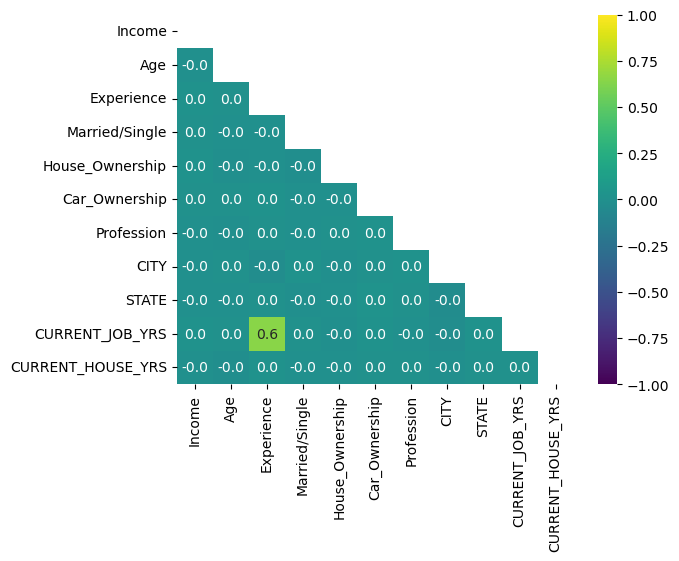

In [123]:
# Generate correlation matrix heat map
matrix = np.triu(train_features1.corr())
sns.heatmap(train_features1.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap='viridis', mask=matrix)

- here with Raw files we can only see one strong correlation Experience and the Current_Job_YRS , therefore will lookforward with all feature set and the reduced feature set.

## Gridsearch CV

In [124]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [125]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {'n_estimators':[5,50,100], 'max_depth':[2,10,20,None]}
cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(train_features1,train_labels1.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 100}
0.878 (+/-0.001) for {'max_depth': 10, 'n_estimators': 5}
0.878 (+/-0.001) for {'max_depth': 10, 'n_estimators': 50}
0.878 (+/-0.001) for {'max_depth': 10, 'n_estimators': 100}
0.891 (+/-0.003) for {'max_depth': 20, 'n_estimators': 5}
0.895 (+/-0.002) for {'max_depth': 20, 'n_estimators': 50}
0.895 (+/-0.002) for {'max_depth': 20, 'n_estimators': 100}
0.893 (+/-0.003) for {'max_depth': None, 'n_estimators': 5}
0.898 (+/-0.003) for {'max_depth': None, 'n_estimators': 50}
0.899 (+/-0.003) for {'max_depth': None, 'n_estimators': 100}


### Feature Importance

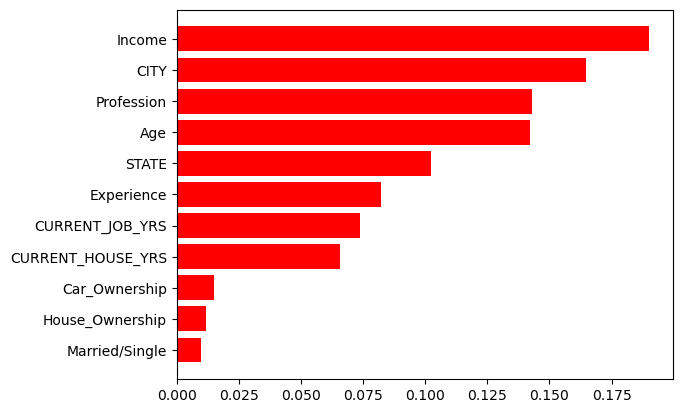

In [126]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features1.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Pickled Model --> 1

In [127]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_raw_features.pkl')

['mdl_raw_features.pkl']

## Build Models To Compare Features: ALL Features to a Nonlinear Model

In [128]:
train_features2 = pd.read_csv('train_features_all.csv')
train_labels2 = pd.read_csv('train_labels.csv')

train_features2.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Age_band,Income_band,Total_EXP
0,-0.227686,1.463103,-1.511913,0.337592,0.27526,-0.657820,-0.696890,1.517480,-1.471987,-1.459045,0.716451,1.502786,-0.172308,-1.634328
1,0.304009,-0.645297,0.321603,0.337592,0.27526,-0.657820,-0.425216,0.171682,0.556445,1.004621,1.430842,-0.640251,0.176497,0.635477
2,-0.096924,-1.465230,-0.011764,0.337592,0.27526,-0.657820,0.321887,-1.380327,1.517281,0.457140,-1.426722,-1.354597,-0.172308,0.181516
3,-0.826310,0.643170,0.154920,0.337592,0.27526,1.520173,-0.832726,0.149976,1.197002,1.278362,0.002060,0.788440,-0.869917,0.635477
4,1.632500,-0.293897,0.654969,0.337592,0.27526,-0.657820,-0.289379,-0.620602,1.197002,-0.911564,1.430842,-0.640251,1.571717,0.068026


<Axes: >

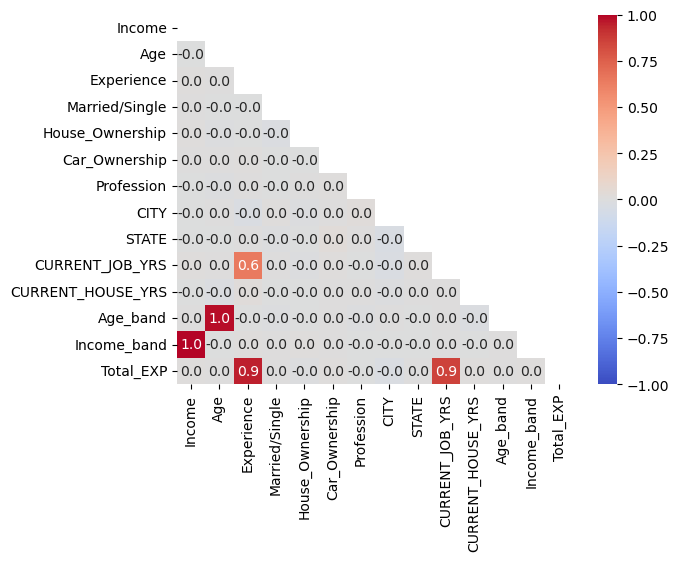

In [129]:
# Generate correlation matrix heat map
matrix = np.triu(train_features2.corr())
sns.heatmap(train_features2.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

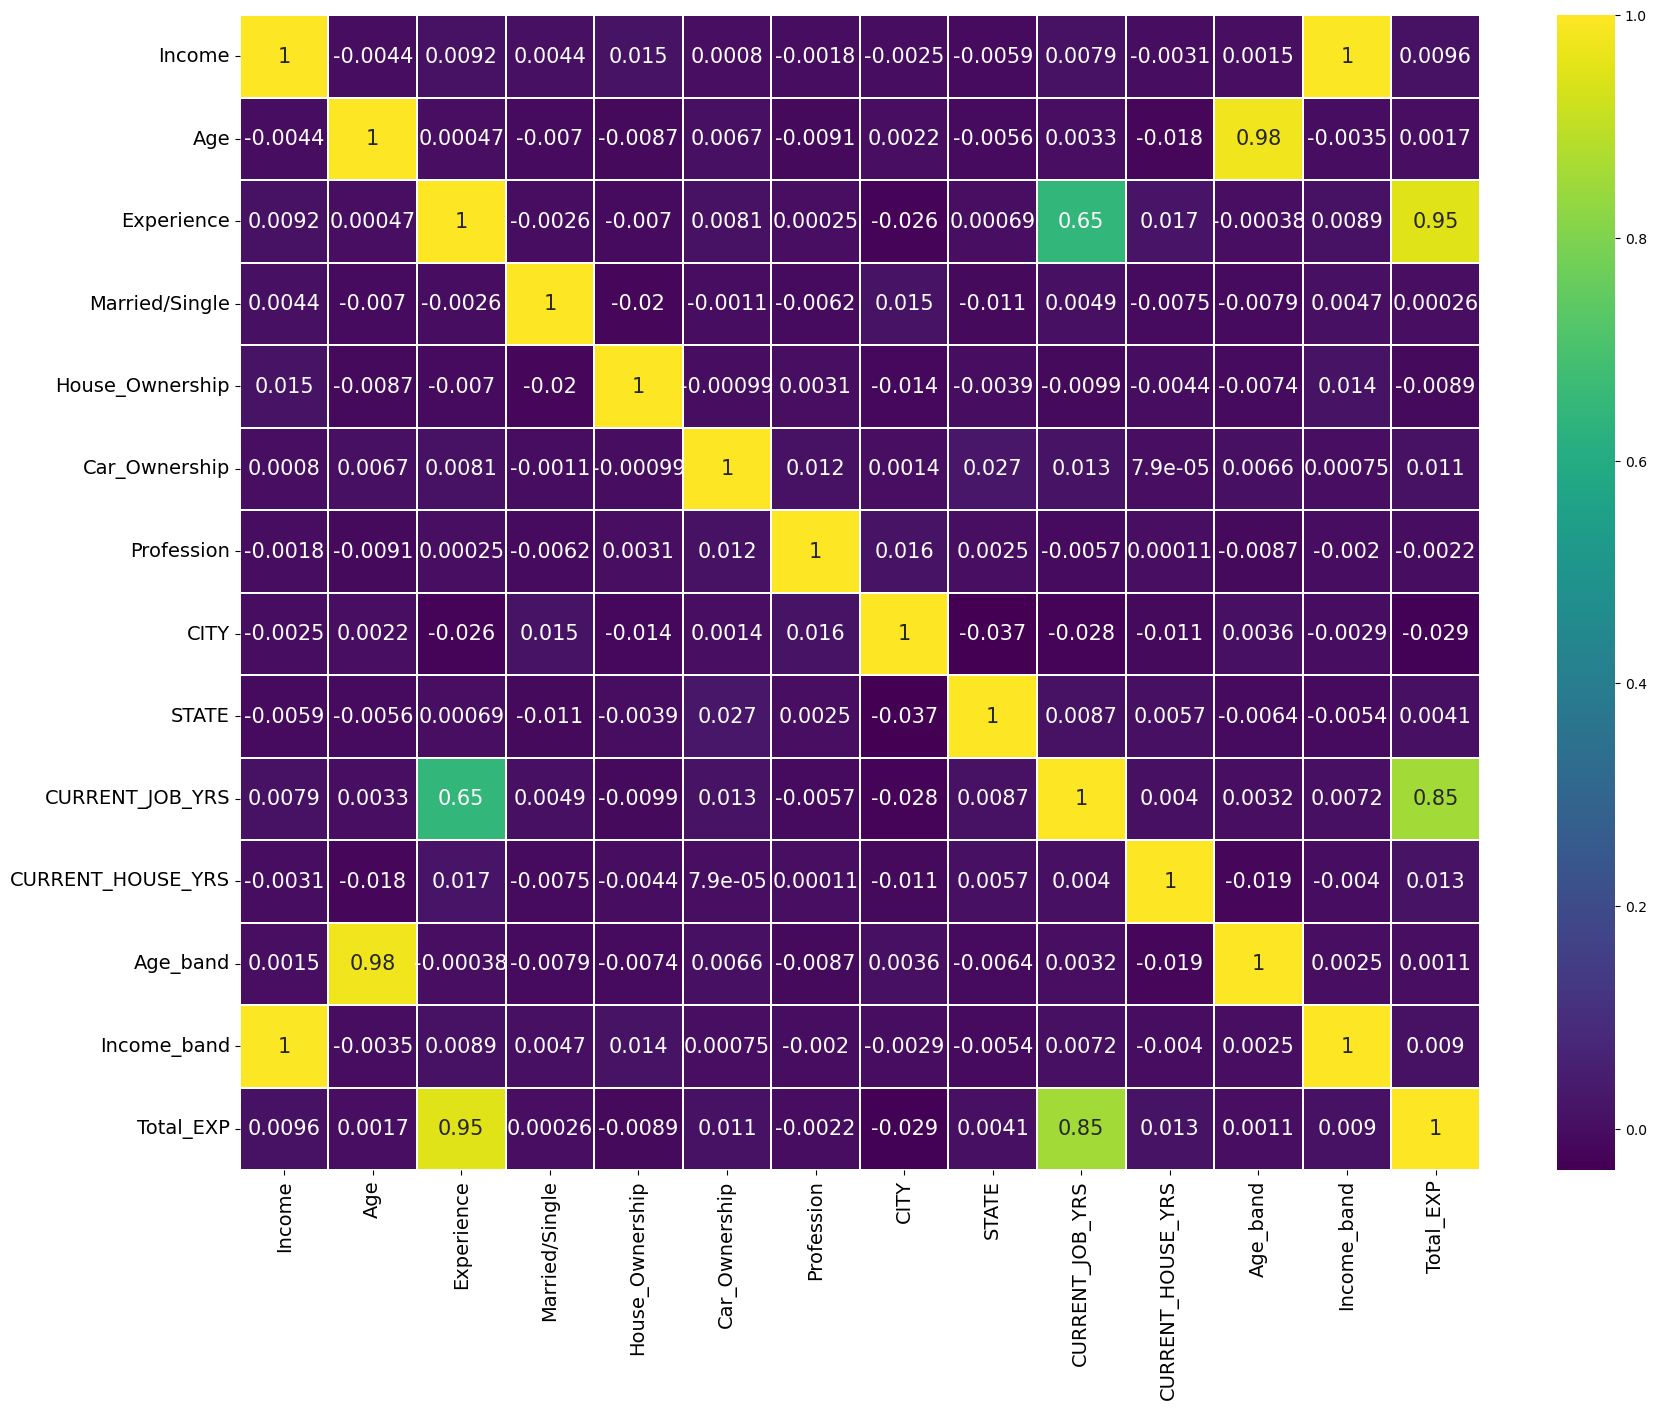

In [130]:
sns.heatmap(train_features2.corr(), annot=True, linewidth=0.2, annot_kws={"size":15}, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### GridSearch CV All Features

In [131]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {'n_estimators':[5,50,100], 'max_depth':[2,10,20,None]}
cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(train_features2,train_labels2.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 50}

0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 100}
0.879 (+/-0.002) for {'max_depth': 10, 'n_estimators': 5}
0.878 (+/-0.0) for {'max_depth': 10, 'n_estimators': 50}
0.878 (+/-0.001) for {'max_depth': 10, 'n_estimators': 100}
0.891 (+/-0.002) for {'max_depth': 20, 'n_estimators': 5}
0.895 (+/-0.003) for {'max_depth': 20, 'n_estimators': 50}
0.895 (+/-0.002) for {'max_depth': 20, 'n_estimators': 100}
0.894 (+/-0.002) for {'max_depth': None, 'n_estimators': 5}
0.899 (+/-0.003) for {'max_depth': None, 'n_estimators': 50}
0.898 (+/-0.003) for {'max_depth': None, 'n_estimators': 100}


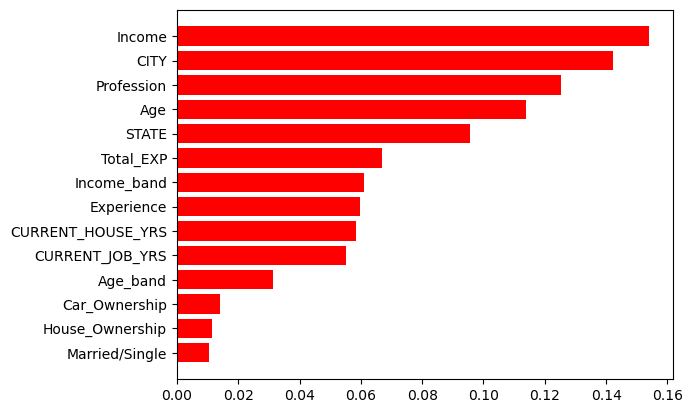

In [132]:
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features2.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Pickled Model --> 2

In [133]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_all_features.pkl')

['mdl_all_features.pkl']

## Build Models To Compare Features: Reduced Set Of Features

In [134]:
train_features3 = pd.read_csv('train_features_reduced.csv')
train_labels3 = pd.read_csv('train_labels.csv')

train_features3.head()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_HOUSE_YRS,Age_band,Income_band,Total_EXP
0,0.337592,0.27526,-0.657820,-0.696890,1.517480,-1.471987,0.716451,1.502786,-0.172308,-1.634328
1,0.337592,0.27526,-0.657820,-0.425216,0.171682,0.556445,1.430842,-0.640251,0.176497,0.635477
2,0.337592,0.27526,-0.657820,0.321887,-1.380327,1.517281,-1.426722,-1.354597,-0.172308,0.181516
3,0.337592,0.27526,1.520173,-0.832726,0.149976,1.197002,0.002060,0.788440,-0.869917,0.635477
4,0.337592,0.27526,-0.657820,-0.289379,-0.620602,1.197002,1.430842,-0.640251,1.571717,0.068026


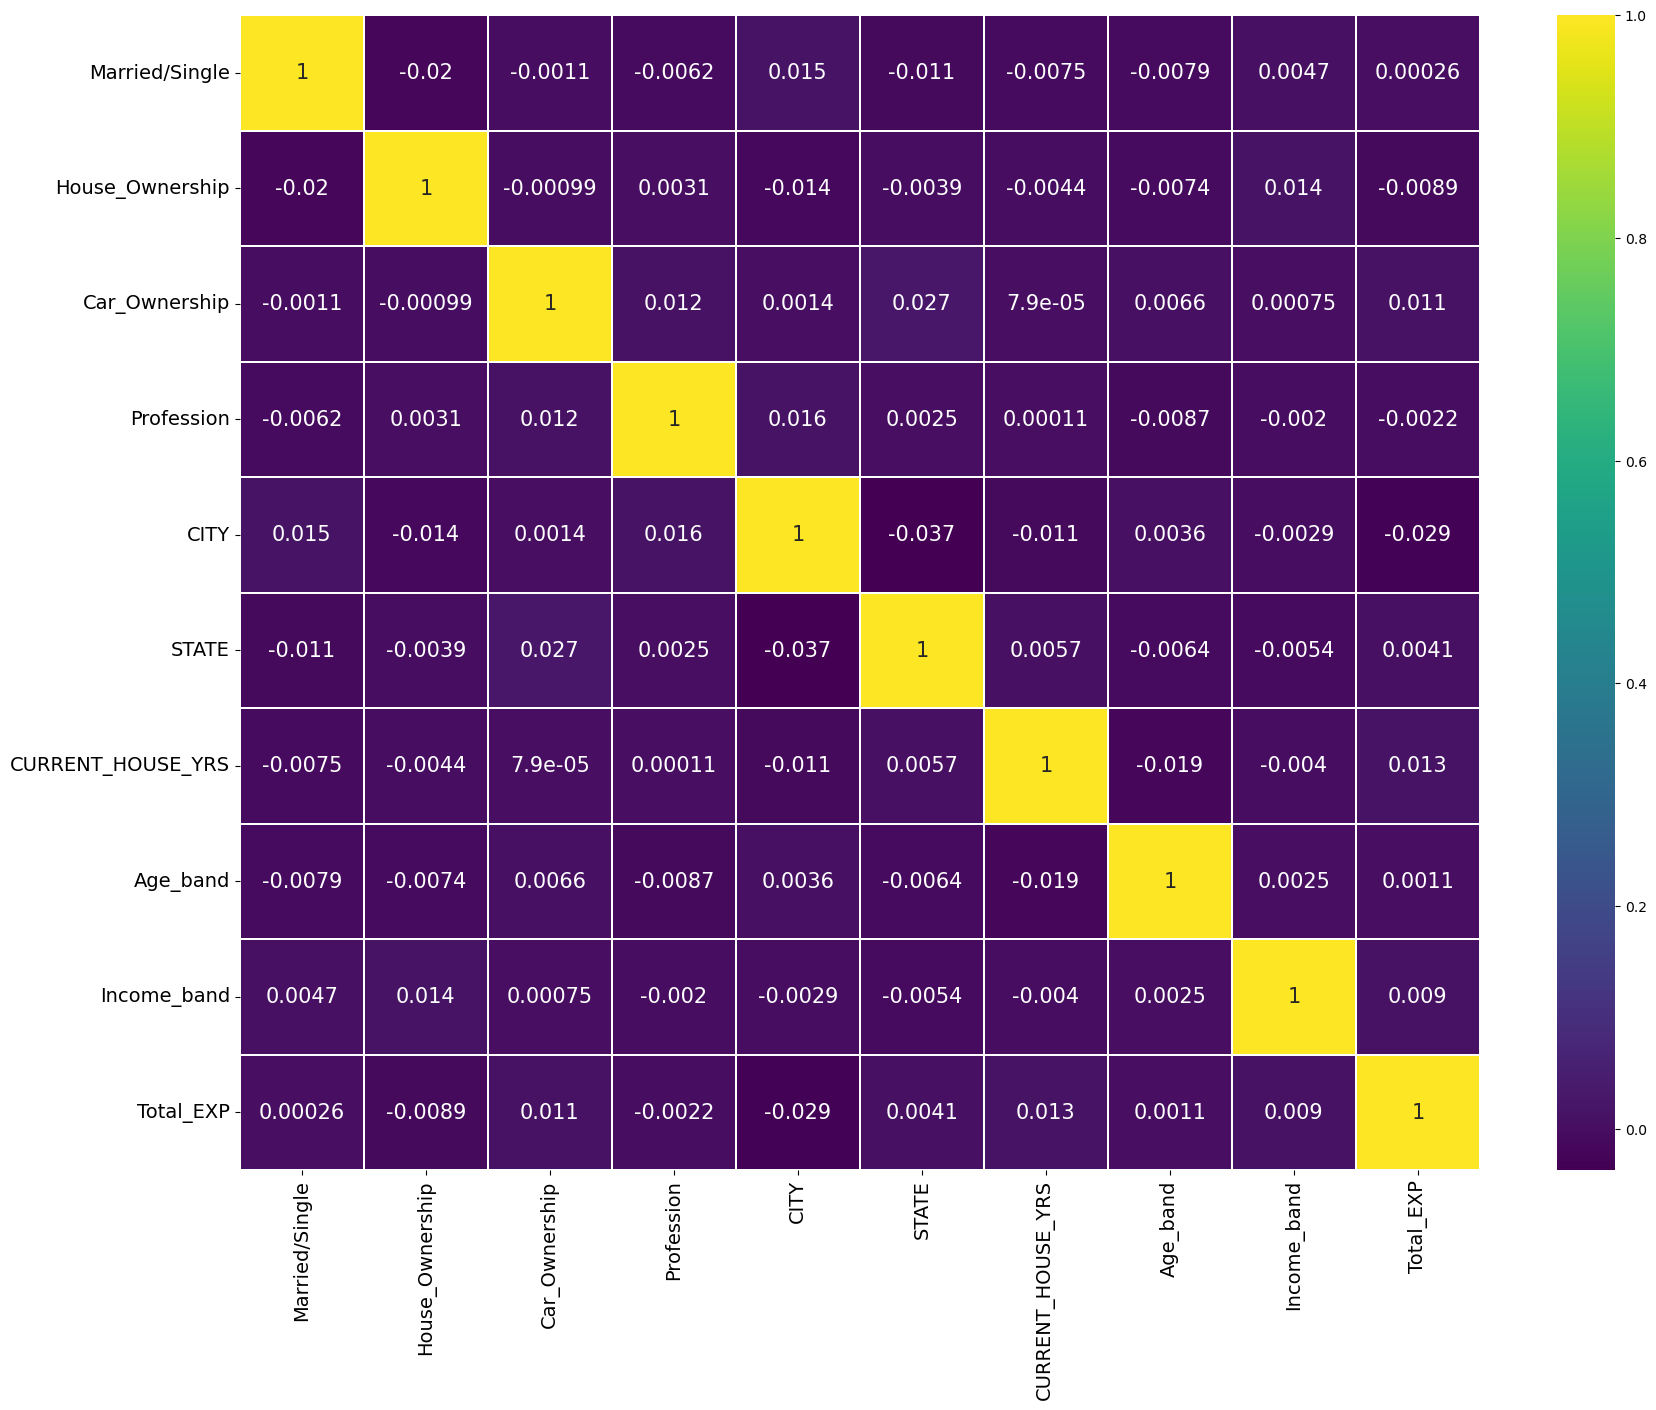

In [135]:
sns.heatmap(train_features3.corr(), annot=True, linewidth=0.2, annot_kws={"size":15}, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [136]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = RandomForestClassifier()
parameters = {'n_estimators':[5,50,100], 'max_depth':[2,10,20,None]}
cv=GridSearchCV(rf,parameters,cv=5)
cv.fit(train_features3,train_labels3.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None, 'n_estimators': 100}

0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.877 (+/-0.0) for {'max_depth': 2, 'n_estimators': 100}
0.878 (+/-0.001) for {'max_depth': 10, 'n_estimators': 5}
0.878 (+/-0.001) for {'max_depth': 10, 'n_estimators': 50}
0.878 (+/-0.001) for {'max_depth': 10, 'n_estimators': 100}
0.892 (+/-0.002) for {'max_depth': 20, 'n_estimators': 5}
0.895 (+/-0.002) for {'max_depth': 20, 'n_estimators': 50}
0.895 (+/-0.004) for {'max_depth': 20, 'n_estimators': 100}
0.894 (+/-0.005) for {'max_depth': None, 'n_estimators': 5}
0.899 (+/-0.003) for {'max_depth': None, 'n_estimators': 50}
0.899 (+/-0.003) for {'max_depth': None, 'n_estimators': 100}


### Feature Importance

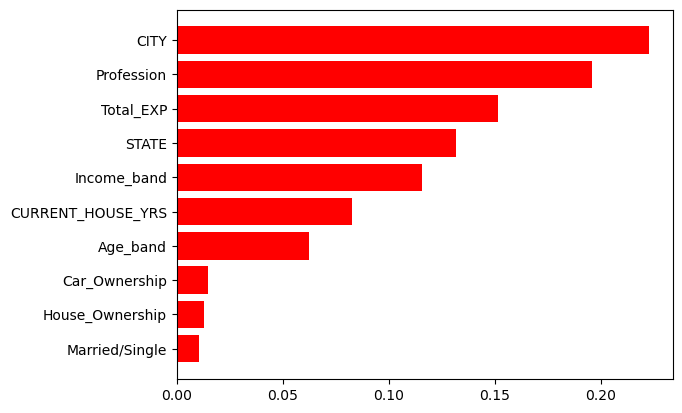

In [137]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)
plt.yticks(range(len(indices)), [train_features3.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

### Pickled Model --> 3

In [138]:
# Write out the model fit on the whole training set
joblib.dump(cv.best_estimator_, 'mdl_reduced_features.pkl')

['mdl_reduced_features.pkl']

# Compare and Evaluate All Models

- Read in Data

In [139]:
# Read in data
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time
%matplotlib inline

val_features_raw = pd.read_csv('val_features_raw.csv')
val_features_all = pd.read_csv('val_features_all.csv')
val_features_reduced = pd.read_csv('val_features_reduced.csv')

val_labels = pd.read_csv('val_labels.csv')


val_features_raw.head()


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.210466,0.057503,0.654969,0.337592,0.27526,-0.657820,0.050213,1.213590,0.663204,-0.637823,0.716451
1,-0.039132,-1.289530,0.488286,0.337592,0.27526,-0.657820,-0.561053,-1.217529,-0.831430,1.004621,0.002060
2,0.918232,-1.523797,-1.511913,0.337592,0.27526,-0.657820,1.068990,-0.707428,-0.724670,-1.459045,-0.712331
3,-1.321412,-1.289530,0.488286,0.337592,0.27526,1.520173,0.457724,1.593453,0.022647,0.183399,-0.712331
4,-0.884665,-0.996697,0.321603,0.337592,0.27526,1.520173,-0.221460,1.441508,0.876723,1.552103,0.002060


In [140]:
# Read models
models = {}

for mdl in ['raw', 'all', 'reduced']:
    models[mdl] = joblib.load('mdl_{}_features.pkl'.format(mdl))

### Evaluate Model on Validation Set

In [141]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round((end - start)*1000, 1)))

In [142]:
# Evaluate all of our models on the validation set
evaluate_model('Raw Features', models['raw'], val_features_raw, val_labels)
evaluate_model('All Features', models['all'], val_features_all, val_labels)
evaluate_model('Reduced Features', models['reduced'], val_features_reduced, val_labels)

Raw Features -- 	Accuracy: 0.899 / Precision: 0.603 / Recall: 0.552 / Latency: 956.5ms
All Features -- 	Accuracy: 0.899 / Precision: 0.603 / Recall: 0.546 / Latency: 507.7ms
Reduced Features -- 	Accuracy: 0.899 / Precision: 0.601 / Recall: 0.549 / Latency: 944.9ms


- In this scenario its important to know which customers have the default risk in paying loans, Therefore models Precision and Sensitivity is important.

- Reduced feature set has been shown up an incremental change in recall with respect to the first optimized model which has been published by me at first.

#### Observation
  - Therefore Re-doing EDA and Feature Engineering in various ways will help to achieve good recall and precision in future. 

### NOTE : This optimization steps has been conducted just to see the results of ML techniques of data Manipulation

### Evaluate Best Model On Test Set

In [143]:
# Read in our test features
test_features = pd.read_csv('test_features_all.csv')
test_labels = pd.read_csv('test_labels.csv')

# Evaluate our final model on the test set
evaluate_model('All Features', models['all'], test_features, test_labels)

All Features -- 	Accuracy: 0.9 / Precision: 0.593 / Recall: 0.532 / Latency: 481.7ms


#### Lets try Out How the ML Ensemble Learning Technique Works on this Problem
- multiple weak models are trained on data and then combined to create a single strong model
- Furthermore we can try Boosting and Stacking ensemble learning techniques to reduce error to gain more precision and sesitivity.